In [1]:
from google.colab import drive
import os,sys
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/thyroid_detection')
sys.path.append('/content/gdrive/MyDrive/thyroid_detecton')


Mounted at /content/drive


In [2]:
!pip install feature_engine
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import feature_engine
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers.winsorizer import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost

In [4]:
df = pd.read_csv("hypothyroid.csv")

In [5]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
df.shape

(3772, 30)

In [ ]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [ ]:
df['TBG']

0       ?
1       ?
2       ?
3       ?
4       ?
       ..
3767    ?
3768    ?
3769    ?
3770    ?
3771    ?
Name: TBG, Length: 3772, dtype: object

In [ ]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [ ]:
[age,sex ,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131,              
query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych                       
TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured ,TBG,referral_source]

SyntaxError: ignored

In [6]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [ ]:
df = df.replace(to_replace = '?',value = np.nan)


In [ ]:
df = df.replace(to_replace = '?',value = np.nan)


In [ ]:
df = df.replace(to_replace='f',value = 0)
df = df.replace(to_replace='t',value = 1)


In [ ]:
df = df.replace(to_replace='F',value = 0)
df = df.replace(to_replace='M',value = 1)


In [7]:
df = df.drop(['TBG measured','TBG','referral source'],axis = 1)

In [9]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass'],
      dtype='object')

In [8]:
df.shape

(3772, 27)

In [ ]:
df.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,psych,TSH measured,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
age,1.000000,-0.003680,0.014577,-0.017870,-0.063882,0.079468,-0.113521,-0.029502,0.053149,0.039562,...,-0.100116,0.105132,0.073113,-0.238412,0.067510,-0.038841,0.085363,-0.166250,0.084535,0.052788
sex,-0.003680,1.000000,-0.100197,0.043981,-0.030491,0.005837,-0.081096,-0.036941,-0.021095,-0.046886,...,0.100237,0.036077,0.076290,-0.070645,0.076164,-0.174276,0.050634,-0.241214,0.051486,-0.041341
on thyroxine,0.014577,-0.100197,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-0.073571,0.041818,-0.145061,0.007996,0.024964,0.218047,0.038852,0.048229,0.038285,0.193196
query on thyroxine,-0.017870,0.043981,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-0.026247,-0.117891,-0.033409,-0.007833,0.029603,-0.004704,0.031550,0.000443,0.031420,-0.003588
on antithyroid medication,-0.063882,-0.030491,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,-0.024318,0.001736,0.010950,0.086597,-0.024649,0.025320,-0.029532,0.066873,-0.029788,-0.018393
sick,0.079468,0.005837,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,-0.032883,0.015588,0.006695,-0.085022,-0.005700,-0.038327,0.009399,-0.040934,0.009068,-0.022200
pregnant,-0.113521,-0.081096,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,-0.016577,0.001401,0.026865,0.192518,0.021097,0.174197,0.032942,0.338130,0.032808,-0.016869
thyroid surgery,-0.029502,-0.036941,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-0.027034,0.039310,-0.023453,-0.028495,0.030491,-0.021816,0.010672,0.029046,0.010488,-0.033109
I131 treatment,0.053149,-0.021095,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,-0.028546,0.041509,0.000150,0.013508,0.032196,-0.008853,0.028540,0.009575,0.028385,-0.017120
query hypothyroid,0.039562,-0.046886,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-0.012320,0.055090,-0.063547,-0.056674,0.024433,-0.009199,0.014517,0.014474,0.014100,-0.020633


In [ ]:
df.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
binaryClass                    0
dtype: int64

In [ ]:
target = df['binaryClass']

In [ ]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
binaryClass                   object
d

In [ ]:
df.drop('binaryClass',axis = 1,inplace = True)

In [ ]:
df['age'] = df['age'].astype(float)
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)

In [ ]:
imputer=sklearn.impute.KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df)
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [ ]:
new_df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
dtype: int64

In [ ]:
#df['FTI'] = df['FTI'].fillna(value = df['FTI'].mean(),inplace = True)
#df['TSH'] = df['TSH'].fillna(value = df['TSH'].mean(),inplace = True)
#df['T3'] = df['T3'].fillna(value = df['T3'].mean(),inplace = True)
#df['TT4'] = df['TT4'].fillna(value = df['TT4'].mean(),inplace = True)
#df['age'] = df['age'].fillna(value = df['age'].mean(),inplace = True)
#df['T4U'] = df['T4U'].fillna(value = df['T4U'].mean(),inplace = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [ ]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
count,3771.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3403.000000,3772.000000,3003.000000,3772.000000,3541.000000,3772.000000,3385.000000,3772.000000,3387.000000
mean,51.735879,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.902174,5.086766,0.796129,2.013500,0.938759,108.319345,0.897402,0.995000,0.897932,110.469649
std,20.084958,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.297119,24.521470,0.402927,0.827434,0.239803,35.604248,0.303473,0.195457,0.302778,33.089698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005000,0.000000,0.050000,0.000000,2.000000,0.000000,0.250000,0.000000,2.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.500000,1.000000,1.600000,1.000000,88.000000,1.000000,0.880000,1.000000,93.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.400000,1.000000,2.000000,1.000000,103.000000,1.000000,0.980000,1.000000,107.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.700000,1.000000,2.400000,1.000000,124.000000,1.000000,1.080000,1.000000,124.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,530.000000,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000


# Exploratory Data Analysis

# Normal Distribution Curve

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

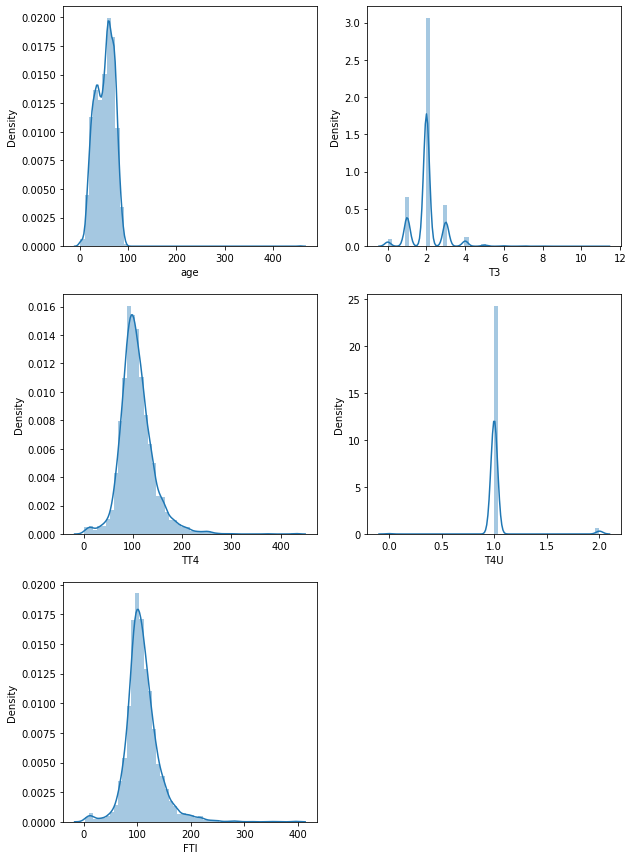

In [ ]:
columns = ['age','T3','TT4','T4U','FTI']
plt.figure(figsize= (10,15),facecolor = 'white')
plotnumber = 1
for col in columns:
  ax = plt.subplot(3,2,plotnumber)
  #print(new_df[col])
  sns.distplot(new_df[col])
  plt.xlabel(col,fontsize = 10)
  plotnumber+=1
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

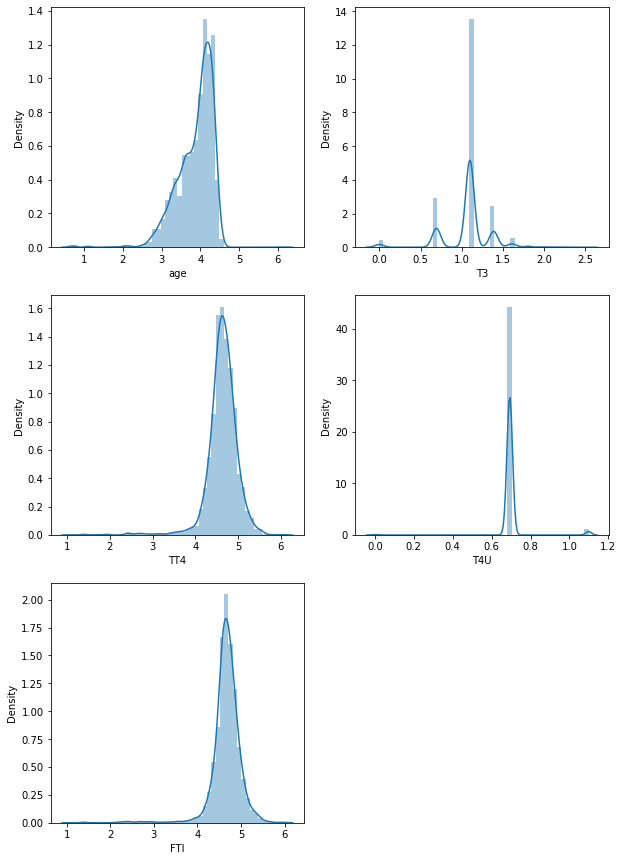

In [ ]:
columns = ['age','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# how to handle imbalance data

**Under-sampling**

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient.

**Over-sampling**


On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples

In [ ]:
rdsample=RandomOverSampler()
x_sampled,y_sampled=rdsample.fit_resample(new_df,target)

# countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


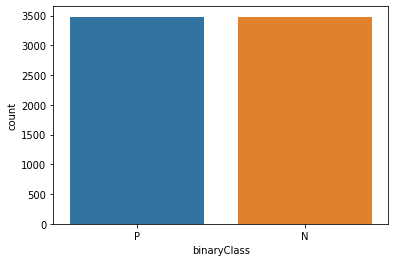

In [ ]:
sns.countplot(y_sampled)

In [ ]:
new_df.drop('TSH',axis = 1,inplace= True)

In [ ]:
# this data is very imbalanced there are lot of people having disease we will use RamdomOverSampler
target.value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
new_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,psych,TSH measured,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,3.0,1.0,126.0,1.0,2.0,1.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,3.0,1.0,103.0,0.0,2.0,0.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,1.0,110.0,1.0,2.0,1.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,3.0,1.0,176.0,0.0,2.0,0.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,62.0,1.0,2.0,1.0,71.0


In [ ]:
x_sampled.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,3.0,1.0,126.0,1.0,2.0,1.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,3.0,1.0,103.0,0.0,2.0,0.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.0,1.0,110.0,1.0,2.0,1.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.0,1.0,176.0,0.0,2.0,0.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,62.0,1.0,2.0,1.0,71.0


# Box Plot

Checking for outliers and removing outliers through winsurizer.

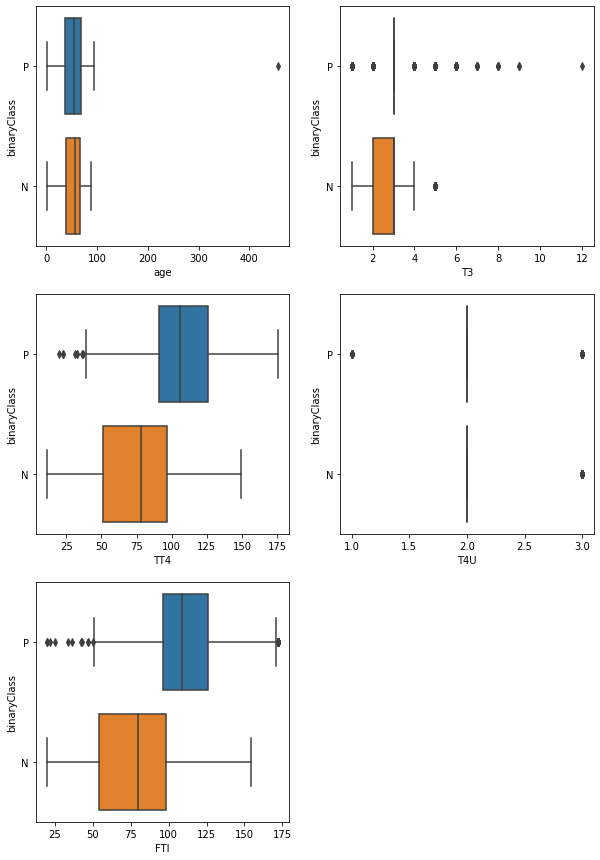

In [ ]:
columns = ['age','T3','TT4','T4U','FTI']
plt.figure(figsize= (10,15),facecolor = 'white')
plotnumber = 1
for col in columns:
  ax1 = plt.subplot(3,2,plotnumber)
  sns.boxplot(x = col, y = y_sampled,data = x_sampled)
  plt.xlabel(col,fontsize = 10)
  plotnumber+=1
plt.show()


# T4U n T3 n TT4 are outliers so we have to remove it.

In [ ]:
winsorizer=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['TT4'])
x_sampled['TT4']=winsorizer.fit_transform(x_sampled[['TT4']])
winsorizer=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['FTI'])

x_sampled['FTI']=winsorizer.fit_transform(x_sampled[['FTI']])


# What is Multi-Collinearity (VIF)
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable


In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(x_sampled)


,variables,VIF
0,age,9.036227
1,sex,1.504942
2,on thyroxine,1.180064
3,query on thyroxine,1.054510
4,on antithyroid medication,1.028249
5,sick,1.081616
6,pregnant,1.101608
7,thyroid surgery,1.023245
8,I131 treatment,1.042921
9,query hypothyroid,1.154185


In [ ]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI'],
      dtype='object')

In [ ]:
# Correlation matrix
x_sampled.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,psych,TSH measured,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI
age,1.000000,0.021971,-0.003338,-0.077793,-0.041304,0.058838,-0.084607,-0.054262,0.046947,0.054099,...,-0.071227,0.075491,0.071219,-0.193522,0.089300,-0.008645,0.110808,-0.041494,0.110377,0.061687
sex,0.021971,1.000000,-0.050450,-0.003175,-0.021104,0.039982,-0.053291,-0.035294,-0.035948,-0.039713,...,0.132536,0.008225,0.085169,-0.079988,0.044446,-0.084275,-0.034567,-0.076248,-0.034103,0.032795
on thyroxine,-0.003338,-0.050450,1.000000,-0.001731,0.006520,-0.037976,0.023228,0.031174,0.057764,0.061552,...,-0.052827,-0.001763,-0.113060,0.049024,0.004490,0.161330,0.033993,0.004567,0.033750,0.159912
query on thyroxine,-0.077793,-0.003175,-0.001731,1.000000,-0.009896,-0.004482,0.032993,-0.000023,-0.014118,-0.038500,...,-0.024127,-0.084164,-0.033963,0.051417,0.024083,0.023978,0.033074,0.011691,0.033004,0.015943
on antithyroid medication,-0.041304,-0.021104,0.006520,-0.009896,1.000000,-0.017313,0.070833,-0.008876,0.003907,-0.022438,...,-0.017636,-0.010249,0.008559,0.077008,-0.025249,0.034089,-0.019424,0.048219,-0.019535,0.014018
sick,0.058838,0.039982,-0.037976,-0.004482,-0.017313,1.000000,-0.017829,-0.007005,-0.024698,0.095277,...,0.076075,0.012076,0.041171,-0.093259,0.005107,0.002664,-0.025489,-0.014644,-0.025726,0.050575
pregnant,-0.084607,-0.053291,0.023228,0.032993,0.070833,-0.017829,1.000000,-0.009140,-0.010627,-0.023439,...,-0.009849,-0.016161,0.014942,0.145093,0.009802,0.129363,0.022454,0.319347,0.022399,0.022543
thyroid surgery,-0.054262,-0.035294,0.031174,-0.000023,-0.008876,-0.007005,-0.009140,1.000000,-0.001025,-0.025198,...,-0.021639,0.024688,-0.038547,0.014687,0.021599,-0.002453,0.014400,0.016048,0.014317,-0.015893
I131 treatment,0.046947,-0.035948,0.057764,-0.014118,0.003907,-0.024698,-0.010627,-0.001025,1.000000,-0.003893,...,-0.025158,0.028704,-0.078317,0.051638,0.025113,-0.000700,0.030716,-0.014761,0.030638,0.003712
query hypothyroid,0.054099,-0.039713,0.061552,-0.038500,-0.022438,0.095277,-0.023439,-0.025198,-0.003893,1.000000,...,0.076746,0.061080,-0.068343,-0.075455,0.046645,-0.085691,-0.014492,-0.026988,-0.014839,-0.078677


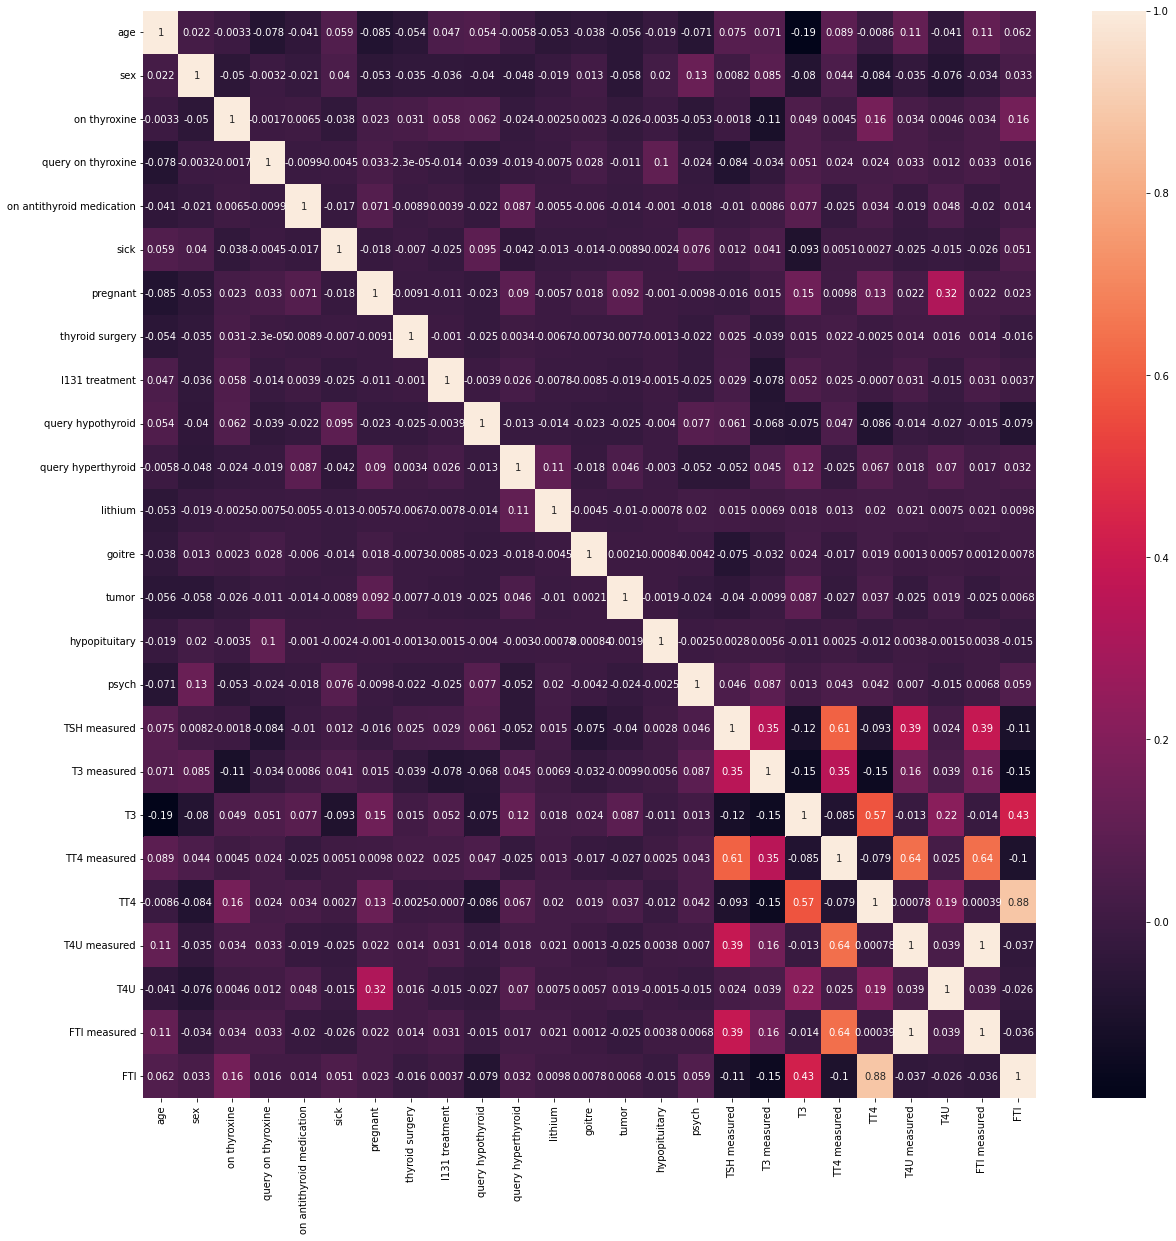

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=x_sampled.corr(),annot=True)
plt.show()

1. Univariate Analysis
2. Correlation Matrix
3. vif -- multicolinearity
4. box plot - outlier - winsorizer
5. Multivariate Analysis

# Algorithms

The Algorithms we can use:

1. Naive Bayes
2. K-Nearest
3. Decision Tree
4. SVM
5. Random Forest
6. Logistic Regression
7. XGBoost

In [ ]:
train_set, test_set,train_label,test_label = train_test_split(x_sampled,y_sampled,test_size = 0.33,random_state = 42)
print(train_set.shape)

(4664, 26)


In [ ]:
y = y_sampled.copy()

# Standard Scalar

In [ ]:
scaler = StandardScaler()

In [ ]:
train_set = scaler.fit_transform(train_set)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(train_set,train_label)
predictions = lr.predict(test_set)
lr_score = accuracy_score(predictions,test_label)
print(lr_score)

0.963881636205396


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [ ]:
from sklearn import svm

In [ ]:
params = {'kernel':['linear','poly','rbf'],'degree':[3,4]}

0.9503916449086162


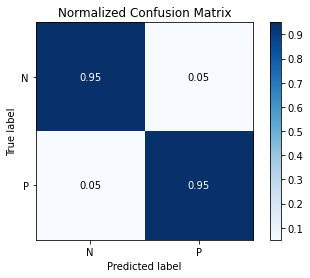

In [ ]:
SVM = SVC()
SVM.fit(train_set,train_label)
sv_predictions = SVM.predict(test_set)
sv_score = accuracy_score(sv_predictions,test_label)
print(sv_score)
confusion_matrix_SVM = confusion_matrix(test_label, sv_predictions)
skplt.metrics.plot_confusion_matrix(test_label, sv_predictions, normalize = True)
plt.show()

In [ ]:
grid = GridSearchCV(estimator=SVM,param_grid=params,cv = 10)
grid.fit(train_set,train_label)
grid.best_estimator_

SVC(kernel='linear')

In [ ]:
sv_tuned = SVC(kernel = 'linear')

In [ ]:
sv_tuned = SVC(kernel = 'linear')
sv_tuned.fit(train_set,train_label)
sv_pred_tuned = sv_tuned.predict(test_set)
accuracy_score(sv_pred_tuned,test_label)

0.9778067885117493

# K-Nearest Neighbors

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(train_set, train_label)
predicted_values_KNN = KNN.predict(test_set)
print(predicted_values_KNN)
accuracy_KNN = accuracy_score(test_label, predicted_values_KNN)
print(accuracy_KNN)

['N' 'N' 'N' ... 'N' 'P' 'P']
0.9834638816362054


In [ ]:
train_set

array([[ 0.16474312,  1.65444235, -0.29354172, ..., -0.12354991,
         0.33237959,  0.31750938],
       [ 0.66789414,  1.65444235, -0.29354172, ..., -0.12354991,
        -3.00860834, -2.05135144],
       [-0.84155892, -0.60443327, -0.29354172, ..., -0.12354991,
         0.33237959, -1.39991472],
       ...,
       [-0.4893532 ,  1.65444235, -0.29354172, ..., -0.12354991,
         0.33237959, -1.25186091],
       [-0.89187402, -0.60443327, -0.29354172, ..., -0.12354991,
         0.33237959,  0.28789862],
       [ 0.66789414, -0.60443327,  3.40667072, ..., -0.12354991,
         0.33237959,  2.30143031]])

In [ ]:
test_set

In [ ]:
KNN_1 = KNeighborsClassifier(n_neighbors=2)
KNN_1.fit(train_set, train_label)
predicted_values_KNN_1 = KNN_1.predict(test_set)
print(predicted_values_KNN_1)
accuracy_KNN_1 = accuracy_score(test_label, predicted_values_KNN_1)
print(accuracy_KNN_1)

['N' 'N' 'N' ... 'N' 'P' 'P']
0.9834638816362054


In [ ]:
predict_knn = pd.DataFrame(predicted_values_KNN)

In [ ]:
predict_knn.value_counts()

N    1177
P    1121
dtype: int64

# XGA Boost

In [ ]:
from xgboost import XGBClassifier
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(train_set,train_label)
xgb_predictions = xgb_cl.predict(test_set)
xbg_score = accuracy_score(xgb_predictions,test_label)
print(xbg_score)

0.9921671018276762


# Hyperparameter Tuning

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
xgb_cl_tuned = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_xg = GridSearchCV(xgb_cl_tuned, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_xg.fit(train_set, train_label)
print(grid_xg.best_score_)
print(grid_xg.best_estimator_)

0.9997002748558595
XGBClassifier(colsample_bytree=0.5, max_depth=5, reg_lambda=0,
              scale_pos_weight=5, subsample=0.8)


In [ ]:
xg_tuned = xgb.XGBClassifier(colsample_bytree=0.5, max_depth=5, reg_lambda=0,scale_pos_weight=5, subsample=0.8)
xg_tuned.fit(train_set,train_label)
xg_tuned_pred = xg_tuned.predict(test_set)
xg_tuned_score = accuracy_score(xg_tuned_pred,test_label)
print(xg_tuned_score)

0.9956483899042646


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() # dt = decision_tree_model
dt_model.fit(train_set,train_label)
dt_model.score(train_set,train_label)
y_predict=dt_model.predict(test_set)
dt_score = accuracy_score(y_predict,test_label)
print(dt_score)

0.9965187119234117


In [ ]:
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,25,1),
    'min_samples_leaf' : range(1,22,1),
    'min_samples_split': range(2,22,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
#hypertuning
dt_grid = GridSearchCV(estimator=dt_model,param_grid=dt_param,cv=3,verbose=1)
dt_grid.fit(train_set,train_label)
print(dt_grid.best_estimator_)
print(dt_grid.best_score_)


Fitting 3 folds for each of 38640 candidates, totalling 115920 fits
DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_split=3)
0.9972127386918385


In [ ]:
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_split=3)
dt_tuned.fit(train_set,train_label)
dt_tuned_pred = dt_tuned.predict(test_set)
dt_tuned_score = accuracy_score(dt_tuned_pred,test_label)
print(dt_tuned_score)


0.9965187119234117


# Random Forest Regressor

In [ ]:
Rf_model=RandomForestClassifier()
Rf_model.fit(train_set,train_label)
rf_predictions = Rf_model.predict(test_set)
rf_score = accuracy_score(test_label,rf_predictions)
print(rf_score)

0.9943429068755439


In [ ]:
rf_params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search_rf=GridSearchCV(estimator=Rf_model,param_grid=rf_params,cv=3,verbose=2,n_jobs=-1)
grid_search_rf.fit(train_set,train_label)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)


In [ ]:
rf_tuned = RandomForestClassifier()
rf_tuned.fit(train_set,train_label)
rf_tuned_pred = rf_tuned.predict(test_set)
rf_tuned_score = accuracy_score(rf_tuned_pred,test_label)
print(rf_tuned_score)


In [ ]:
# Saving Model

# Method Comparsion

In [ ]:
predictions = dict()
predictions['logistic_regression'] = lr_score*100
predictions['svm'] = sv_score*100
predictions['kNN'] = accuracy_KNN*100
predictions['xgboost'] = xg_tuned_score*100
predictions['decision_trees'] = dt_tuned_score*100
predictions['random_forest'] = rf_score*100

,Algorithms,Percentage
0,logistic_regression,96.388164
1,svm,95.039164
2,kNN,98.346388
3,xgboost,99.564839
4,decision_trees,99.651871
5,random_forest,99.434291


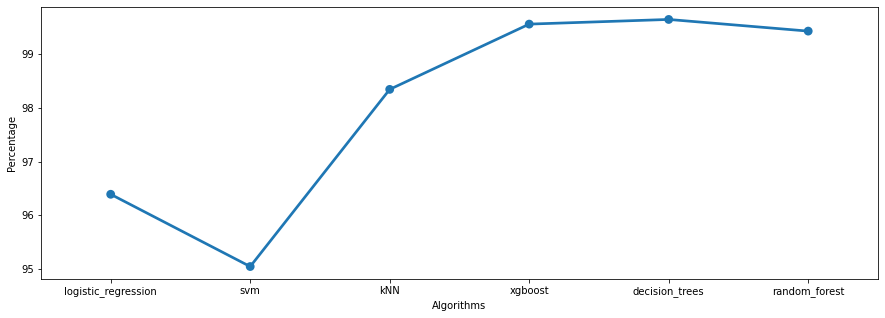

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);

# DUMPING MODELS

In [ ]:
import pickle
filename1 = 'logistic_regression.pkl'
filename2 = 'svm.pkl'
filename3 = 'kNN.pkl'
filename4 = 'xgboost.pkl'
filename5 = 'decision_trees.pkl'
filename6 = 'random_forest.pkl'
pickle.dump(lr,open(filename1,'wb'))
pickle.dump(sv_tuned,open(filename2,'wb'))
pickle.dump(KNN,open(filename3,'wb'))
pickle.dump(xg_tuned,open(filename4,'wb'))
pickle.dump(dt_tuned,open(filename5,'wb'))
pickle.dump(Rf_model,open(filename6,'wb'))
